In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import talib

from keras.layers import Dense, LSTM, Activation, Dropout
from keras.models import Sequential
from keras.optimizers import Nadam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau

import datetime

Using TensorFlow backend.
c:\programdata\anaconda3\envs\upbit\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\programdata\anaconda3\envs\upbit\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\programdata\anaconda3\envs\upbit\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\programdata\anaconda3\envs\upbit\lib\site-pa

In [2]:
root_dir = 'C:\\Users\\ojkk3\\PycharmProjects\\coin_crawler\\data\\'
file_list = os.listdir(root_dir)

In [ ]:
pd.options.display.float_format = '{:.0f}'.format

In [8]:
data = pd.read_csv(root_dir + "upbit_KRW_XRP_minutes_15.csv")
data

,date,open,high,low,close,volume
0,2020-03-14T10:00:00+00:00,192,193,191,191,630263
1,2020-03-14T09:45:00+00:00,192,193,190,191,3147385
2,2020-03-14T09:30:00+00:00,194,195,193,193,1293161
3,2020-03-14T09:15:00+00:00,195,195,193,193,1196142
4,2020-03-14T09:00:00+00:00,195,195,193,195,1788169
...,...,...,...,...,...,...
70010,2018-03-14T01:00:00+00:00,869,870,866,869,512258
70011,2018-03-14T00:45:00+00:00,860,872,859,869,1058177
70012,2018-03-14T00:30:00+00:00,862,863,858,860,492629
70013,2018-03-14T00:15:00+00:00,865,866,862,862,463704


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70015 entries, 0 to 70014
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    70015 non-null  object 
 1   open    70015 non-null  float64
 2   high    70015 non-null  float64
 3   low     70015 non-null  float64
 4   close   70015 non-null  float64
 5   volume  70015 non-null  float64
dtypes: float64(5), object(1)
memory usage: 3.2+ MB


In [10]:
df = data.set_index('date')
df

,open,high,low,close,volume
date,,,,,
2020-03-14T10:00:00+00:00,192,193,191,191,630263
2020-03-14T09:45:00+00:00,192,193,190,191,3147385
2020-03-14T09:30:00+00:00,194,195,193,193,1293161
2020-03-14T09:15:00+00:00,195,195,193,193,1196142
2020-03-14T09:00:00+00:00,195,195,193,195,1788169
...,...,...,...,...,...
2018-03-14T01:00:00+00:00,869,870,866,869,512258
2018-03-14T00:45:00+00:00,860,872,859,869,1058177
2018-03-14T00:30:00+00:00,862,863,858,860,492629


In [11]:
def Indicators(df): # date close open high low volume 컬럼순 
                    # 결측치 33줄 생김 0~32 까지
    #df['sma5'] = talib.SMA(np.asarray(df['close']), 5)
    #df['sma20'] = talib.SMA(np.asarray(df['close']), 20)
    #df['sma120'] = talib.SMA(np.asarray(df['close']), 120)
    #df['ema12'] = talib.SMA(np.asarray(df['close']), 12)
    #df['ema26'] = talib.SMA(np.asarray(df['close']), 26)
    #upper, middle, lower = talib.BBANDS(np.asarray(df['close']), timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
    #df['dn'] = lower
    #df['mavg'] = middle
    #df['up'] = upper
    #df['pctB'] = (df.close - df.dn)/(df.up - df.dn)
    rsi14 = talib.RSI(np.asarray(df['close']), 14)
    df['rsi14'] = rsi14
    macd, macdsignal, macdhist = talib.MACD(np.asarray(df['close']), 12, 26, 9)  
    df['macd'] = macd
    df['macdsignal'] = macdsignal
    df['obv']=talib.OBV(df['close'], df['volume'])
    #df['ad'] = talib.AD(df['high'], df['low'], df['close'], df['volume'])
    #df['ADOSC'] = talib.ADOSC(df['high'], df['low'], df['close'], df['volume'], fastperiod=3, slowperiod=10)
    return df

In [19]:
df = pd.DataFrame(data=df, dtype=np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70015 entries, 2020-03-14T10:00:00+00:00 to 2018-03-14T00:00:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    70015 non-null  float64
 1   high    70015 non-null  float64
 2   low     70015 non-null  float64
 3   close   70015 non-null  float64
 4   volume  70015 non-null  float64
dtypes: float64(5)
memory usage: 3.2+ MB


In [12]:
Indicators(df)
df

,open,high,low,close,volume,rsi14,macd,macdsignal,obv
date,,,,,,,,,
2020-03-14T10:00:00+00:00,192,193,191,191,630263,nan,nan,nan,630263
2020-03-14T09:45:00+00:00,192,193,190,191,3147385,nan,nan,nan,630263
2020-03-14T09:30:00+00:00,194,195,193,193,1293161,nan,nan,nan,1923425
2020-03-14T09:15:00+00:00,195,195,193,193,1196142,nan,nan,nan,1923425
2020-03-14T09:00:00+00:00,195,195,193,195,1788169,nan,nan,nan,3711594
...,...,...,...,...,...,...,...,...,...
2018-03-14T01:00:00+00:00,869,870,866,869,512258,65,5,5,2300362194
2018-03-14T00:45:00+00:00,860,872,859,869,1058177,65,5,5,2300362194
2018-03-14T00:30:00+00:00,862,863,858,860,492629,47,4,5,2299869565


In [13]:
df.to_csv("rsi-macd-obv.csv", mode='a', header=True)

In [16]:
ds = pd.read_csv("F:\\jupyter_project\\upbit_Net\\rsi-macd-obv.csv")
ds.tail(50)

,date,open,high,low,close,volume,rsi14,macd,macdsignal,obv
69965,2018-03-14T12:00:00+00:00,823,825,813,813,1058295,57,8,10,2296139120
69966,2018-03-14T11:45:00+00:00,827,828,822,823,397349,64,8,10,2296536468
69967,2018-03-14T11:30:00+00:00,825,828,825,827,175688,66,8,9,2296712157
69968,2018-03-14T11:15:00+00:00,826,830,824,825,524102,64,8,9,2296188055
69969,2018-03-14T11:00:00+00:00,828,831,822,826,537151,64,8,9,2296725207
69970,2018-03-14T10:45:00+00:00,827,834,823,828,713328,66,8,9,2297438534
69971,2018-03-14T10:30:00+00:00,833,833,823,827,1089905,65,8,9,2296348629
69972,2018-03-14T10:15:00+00:00,844,844,829,834,1497370,69,8,9,2297845999
69973,2018-03-14T10:00:00+00:00,843,845,840,844,434513,74,9,9,2298280512
69974,2018-03-14T09:45:00+00:00,847,848,841,843,849779,73,10,9,2297430733


In [21]:
high = df['high'].values
low = df['low'].values
mid = (high + low) / 2

In [22]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid) - sequence_length):
    result.append(mid[index: index + sequence_length])

In [23]:
def normalize_windows(df):
    normalized_data = []
    for window in df:
        normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalized_data.append(normalized_window)
    return np.array(normalized_data)

result = normalize_windows(result)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((62968, 50, 1), (6996, 50, 1))

In [24]:
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

In [25]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Attention(50))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
attention_1 (Attention)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [27]:
start_time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')

model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=1,
    callbacks=[
        TensorBoard(log_dir='logs/%s' % (start_time)),
        ModelCheckpoint('./models/%s_xrp.h5' % (start_time), monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='auto')
])

Train on 62968 samples, validate on 6996 samples
Epoch 1/1
62968/62968 [==============================] - 161s 3ms/step - loss: 1.7669e-05 - val_loss: 2.7481e-05

Epoch 00001: val_loss improved from inf to 0.00003, saving model to ./models/2020_03_14_19_17_42_xrp.h5


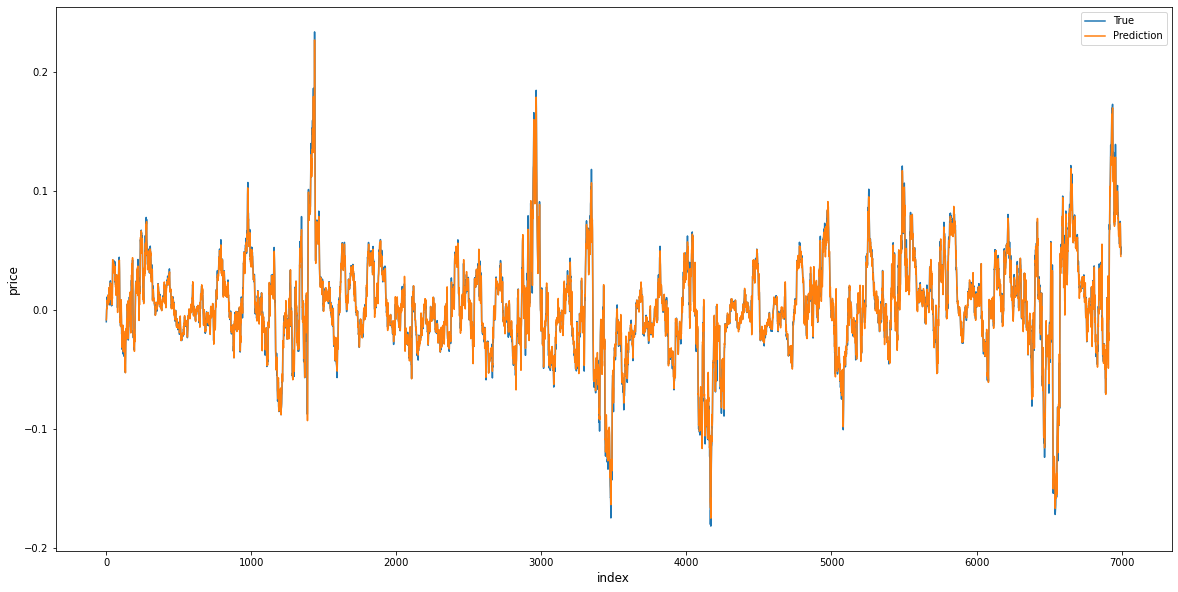

In [31]:
pred = model.predict(x_test)
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()